# Imports

In [1]:
from math import radians
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

# Data

In [2]:
cole = pd.read_csv('../data/gerrit-cole.csv')
cole.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(cole.shape)
cole.head(2)

(2969, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,CH,2021-09-29,90.3,-1.83,5.55,"Cole, Gerrit",624512,543037,out,hit_into_play,4,Reese McGuire flies out to center fielder Bret...,R,L,R,TOR,NYY,X,8.0,fly_ball,1,1,2021,-1.24,8.64,-0.49,2.15,NaN,NaN,669289.0,2,6,Bot,118.83,87.48,543309,6.015335,-131.280391,-4.011456,-15.614875,29.851469,-23.248081,3.37,1.53,264.0,84.0,46.0,90.7,1571.0,6.7,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,53.75,0.014,0.017,0.0,1.0,0.0,0.0,3.0,49,3,Changeup,5,3,5,3,3,5,5,3,Standard,Standard,243.0,-0.014,-0.215,1,1-1,0.49,14.88,0
1,CH,2021-09-29,89.4,-1.78,5.57,"Cole, Gerrit",624512,543037,NaN,foul,5,Reese McGuire flies out to center fielder Bret...,R,L,R,TOR,NYY,S,NaN,NaN,1,0,2021,-1.60,4.20,0.23,2.62,NaN,NaN,669289.0,2,6,Bot,NaN,NaN,543309,8.390092,-129.917469,-1.924524,-19.921778,29.608677,-28.057483,3.37,1.53,NaN,NaN,NaN,89.5,1807.0,6.6,632296,543037,543309,519203,650402,518934,570482,608336,458731,592450,53.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,2,Changeup,5,3,5,3,3,5,5,3,Standard,Standard,240.0,0.000,-0.048,1,1-0,-0.23,19.20,0


In [3]:
def decdeg2dms(dd):
    hr,mnt = divmod(dd*60,1)
    deg,hr = divmod(hr,1)
    return deg,hr,mnt

dd = 45 + 1/12 + 30.0/60
print(dd)
decdeg2dms(dd)

45.583333333333336


(2735.0, 0.0, 0.0)

In [4]:
spin_axis = cole.groupby(['pitch_type']).mean()
spin_axis

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,89.838955,-2.004323,5.509881,612180.928741,543037.0,10.330166,4.612903,1.040380,1.068884,2021.0,-1.318575,9.987363,-0.281496,1.730143,576391.560000,616547.671429,603594.762712,0.954869,4.102138,134.235000,132.216250,548077.774347,7.106923,-130.559345,-5.161084,-16.573640,27.741678,-21.761646,3.372352,1.558219,115.930070,79.664336,4.377622,90.128266,1719.200000,6.686667,633514.194774,543037.0,548077.774347,542725.463183,566078.130641,564339.320665,635542.342043,604133.695962,519903.921615,588294.655582,53.815036,0.259830,0.275739,0.266788,1.0,0.175182,0.102190,2.818182,30.104513,3.311164,1.524941,1.270784,1.083135,1.712589,1.285036,1.536817,1.109264,1.712589,240.069048,-0.001827,-0.005083,0.638955,0.281496,15.822898,0.163895
FF,97.674267,-1.919936,5.678299,611444.471051,543037.0,7.666905,4.903915,0.901358,0.948535,2021.0,-0.999478,17.968949,0.010229,2.873495,614087.956522,615628.107477,606533.495627,0.927091,3.542530,127.360691,111.305957,549049.254467,7.528449,-141.929736,-5.484434,-15.260976,33.815294,-10.880390,3.394496,1.569335,199.590726,84.251111,30.327273,97.725375,2452.342878,6.565426,633449.982845,543037.0,549049.254467,545687.285204,567716.019299,562595.456040,634555.440315,599176.687634,521097.661901,588724.588992,53.933824,0.346282,0.421612,0.288942,1.0,0.166667,0.160256,3.462766,25.727663,2.954968,1.132237,1.246605,0.932809,1.446033,1.253753,1.146533,0.954253,1.446033,216.839656,-0.000856,-0.013400,0.696212,-0.010229,11.993738,0.128663
KC,83.430108,-1.960882,5.769312,611502.152688,543037.0,9.531183,5.144578,0.556989,0.821505,2021.0,0.871398,-11.990968,0.226968,1.787978,622810.000000,626419.000000,604046.639344,0.980645,3.464516,116.200156,110.715625,549103.587097,3.330220,-121.401106,-0.702539,7.829041,25.973127,-42.047722,3.351140,1.550215,127.182692,85.126923,-1.221154,83.193118,2799.793548,6.343656,633569.036559,543037.0,549103.587097,548479.062366,572416.974194,561600.817204,637673.294624,602224.002151,514071.270968,593224.124731,54.157634,0.379625,0.436156,0.347778,1.0,0.244444,0.177778,3.421875,24.924731,2.490323,1.038710,1.197849,0.823656,1.412903,1.202151,1.051613,0.840860,1.412903,39.830108,0.001415,-0.000968,0.630108,-0.226968,-10.456774,0.109677
SI,97.664000,-2.043600,5.580800,626145.160000,543037.0,6.560000,4.875000,0.920000,0.960000,2021.0,-1.403600,14.563200,-0.277200,2.683200,570731.000000,663941.750000,587912.625000,1.080000,3.640000,140.365714,119.964286,545422.320000,8.030353,-141.901885,-5.085039,-20.813411,33.990350,-14.780402,3.385200,1.553200,144.500000,86.910000,12.400000,97.928000,2374.720000,6.620000,633481.160000,543037.0,545422.320000,543998.200000,573552.720000,570450.480000,640677.920000,592006.600000,511013.280000,592988.680000,53.879200,0.313571,0.417000,0.522222,1.0,0.333333,0.333333,3.285714,26.120000,2.920000,1.320000,0.840000,0.800000,1.360000,0.840000,1.400000,0.880000,1.360000,219.440000,0.000280,0.072440,0.840000,0.277200,16.843200,0.200000
SL,88.388619,-1.943551,5.694264,602350.408194,543037.0,10.854325,4.243750,0.843703,1.103187,2021.0,0.445341,0.486555,0.847162,1.810030,610523.511628,609878.990385,612025.229814,0.965099,3.578149,123.868710,1

In [5]:
r_cole = cole.loc[cole['stand'] == 'R']
l_cole = cole.loc[cole['stand'] == 'L']

ff = cole.loc[cole['pitch_type'] == 'FF']
sl = cole.loc[cole['pitch_type'] == 'SL']
kc = cole.loc[cole['pitch_type'] == 'KC']
ch = cole.loc[cole['pitch_type'] == 'CH']
si = cole.loc[cole['pitch_type'] == 'SI']

r_ff = cole.loc[(cole['pitch_type'] == 'FF') & (cole['stand'] == 'R')]
r_sl = cole.loc[(cole['pitch_type'] == 'SL') & (cole['stand'] == 'R')]
r_kc = cole.loc[(cole['pitch_type'] == 'KC') & (cole['stand'] == 'R')]
r_ch = cole.loc[(cole['pitch_type'] == 'CH') & (cole['stand'] == 'R')]
r_si = cole.loc[(cole['pitch_type'] == 'SI') & (cole['stand'] == 'R')]

l_ff = cole.loc[(cole['pitch_type'] == 'FF') & (cole['stand'] == 'L')]
l_sl = cole.loc[(cole['pitch_type'] == 'SL') & (cole['stand'] == 'L')]
l_kc = cole.loc[(cole['pitch_type'] == 'KC') & (cole['stand'] == 'L')]
l_ch = cole.loc[(cole['pitch_type'] == 'CH') & (cole['stand'] == 'L')]
l_si = cole.loc[(cole['pitch_type'] == 'SI') & (cole['stand'] == 'L')]

# Pitcher Overview

### Pitch Usage

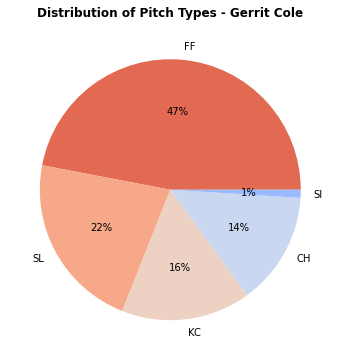

In [6]:
plt.figure(figsize = (8, 6))

dist = round(cole.pitch_type.value_counts(normalize = True), 2)
labels = ['FF', 'SL', 'KC', 'CH', 'SI']
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = labels, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Gerrit Cole', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

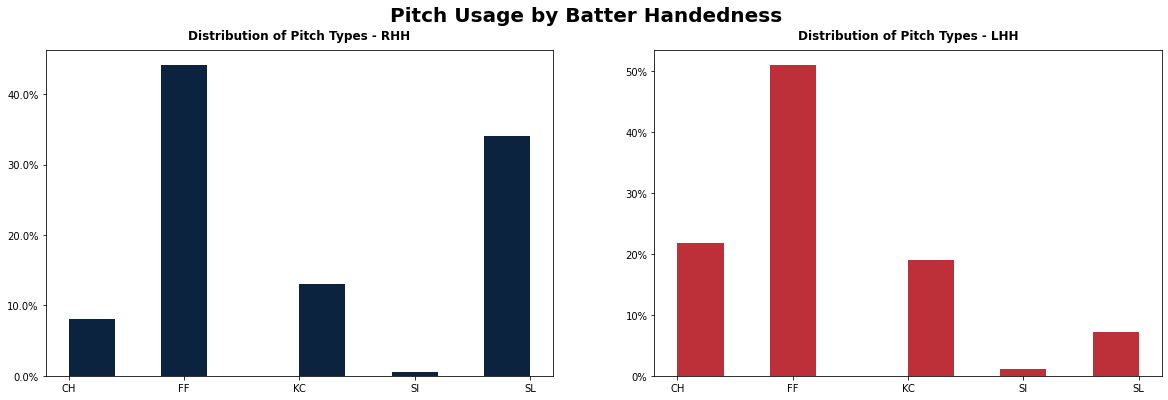

In [7]:
red = '#BD3039'
blue = '#0C2340'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_cole.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_cole.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

FF velo sits: 97 - 98 mph,  max: 101.5 mph
SL velo sits: 88 - 89 mph,  max: 91.9 mph
KC velo sits: 82 - 84 mph,  max: 86.9 mph
CH velo sits: 89 - 91 mph,  max: 94.6 mph
SI velo sits: 97 - 99 mph,  max: 99.7 mph


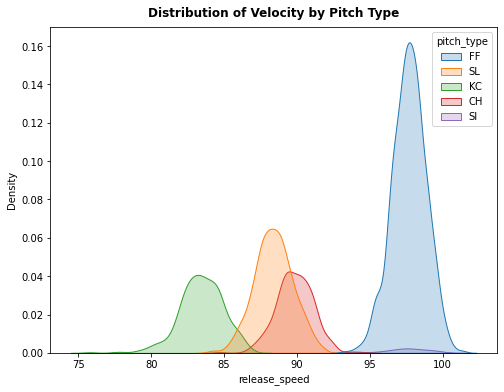

In [8]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = cole, x = 'release_speed', shade = 'fill', 
            multiple = 'layer', hue = 'pitch_type', 
            hue_order = ['FF', 'SL', 'KC', 'CH', 'SI'], 
            palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type', fontdict = font_title, pad = 15);

print('FF velo sits:', round(ff['release_speed'].quantile(.25)), '-', round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph')
print('SL velo sits:', round(sl['release_speed'].quantile(.25)), '-', round(sl['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(sl['release_speed'].max(), 2), 'mph')
print('KC velo sits:', round(kc['release_speed'].quantile(.25)), '-', round(kc['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(kc['release_speed'].max(), 2), 'mph')
print('CH velo sits:', round(ch['release_speed'].quantile(.25)), '-', round(ch['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ch['release_speed'].max(), 2), 'mph')
print('SI velo sits:', round(si['release_speed'].quantile(.25)), '-', round(si['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(si['release_speed'].max(), 2), 'mph')

### Release Postion
- From hitters' perspective

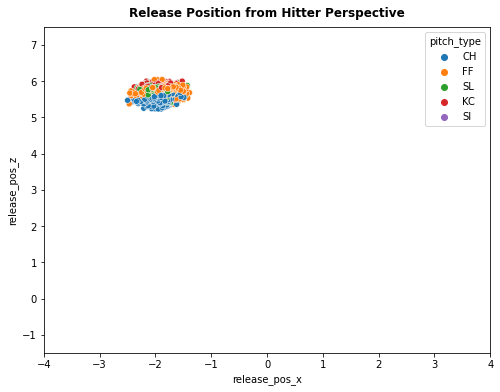

In [9]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = cole, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1.5, 7.5)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Velocity & Spin Rate by Pitch Type

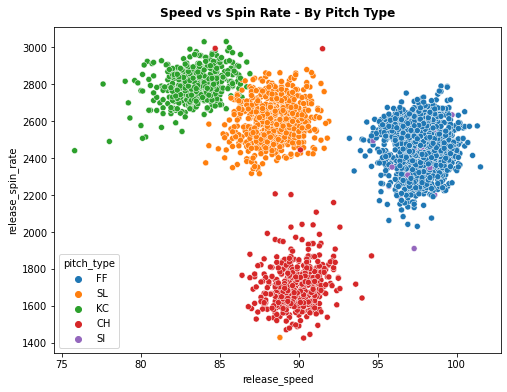

In [10]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = cole, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = ['FF', 'SL', 'KC', 'CH', 'SI'], palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Spin Axis

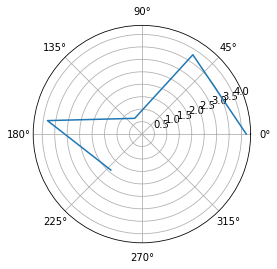

In [11]:
ax = plt.subplot(polar = True)

ax.plot([radians(x) for x in spin_axis['spin_axis'].values]);

### Horizontal and Vertical Break Axis

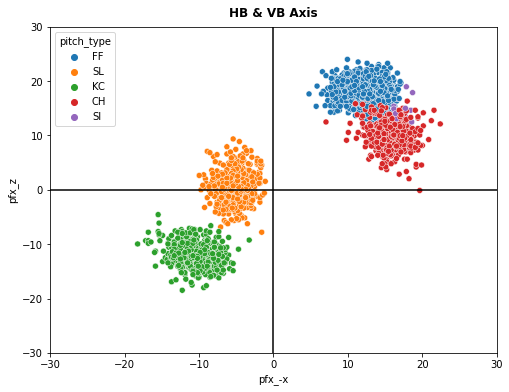

In [12]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = cole, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = ['FF', 'SL', 'KC', 'CH', 'SI'], palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Breakdown of Pitch Usage by Count

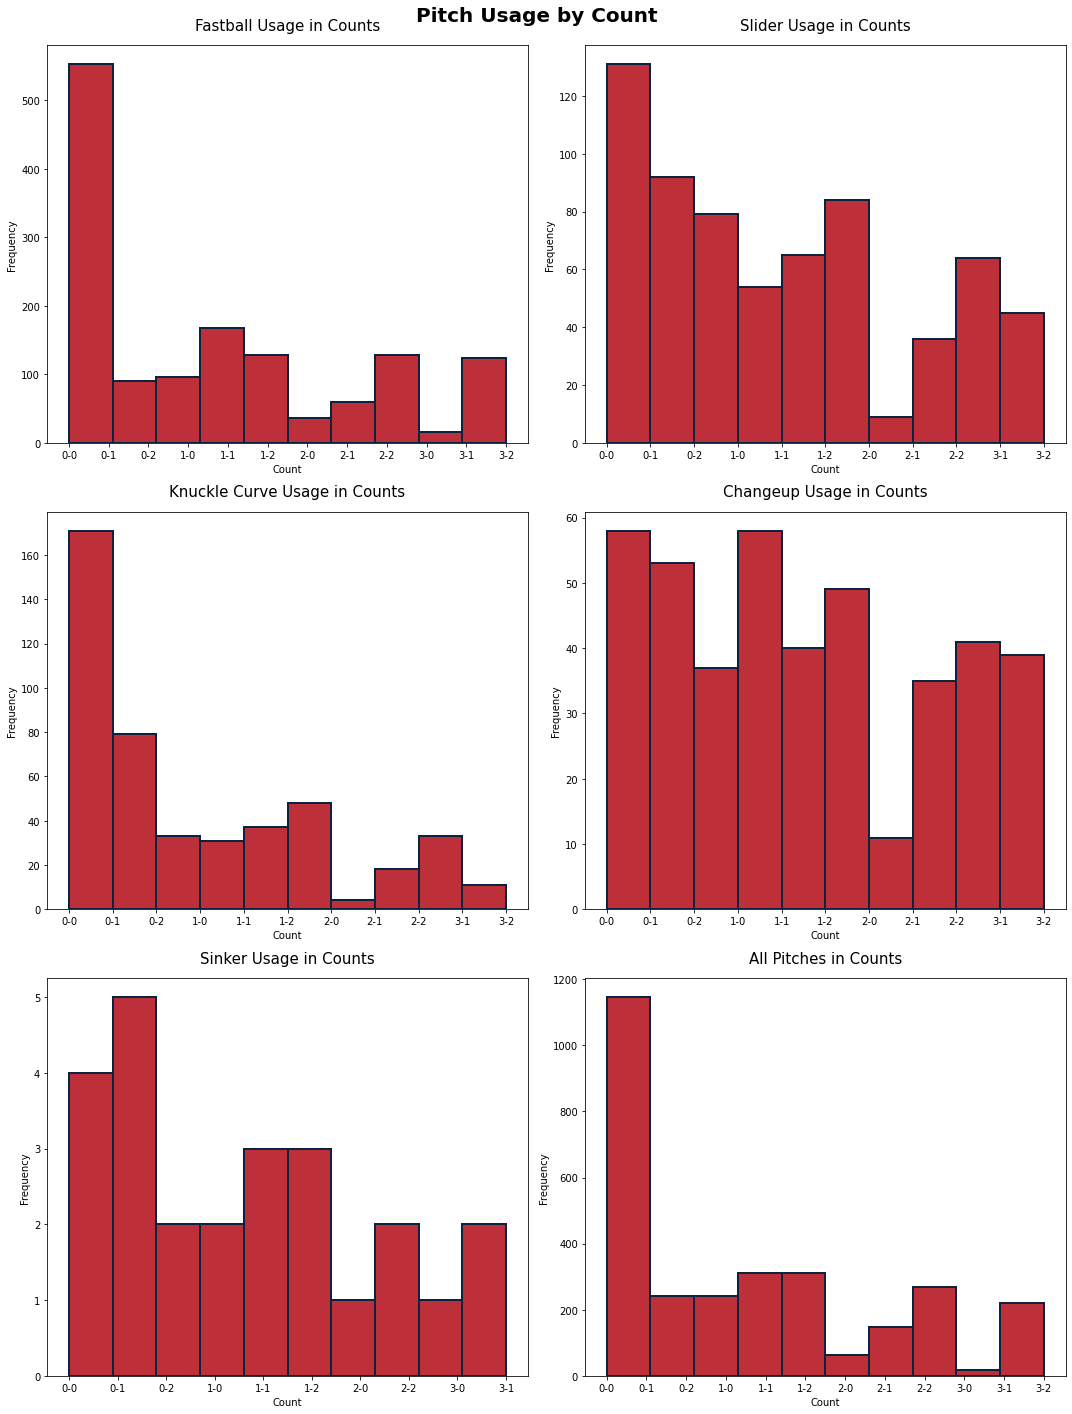

In [13]:
fig, axs = plt.subplots(3, 2, figsize = (15, 20))
fig.suptitle('Pitch Usage by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')

axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][0].set_title('Fastball Usage in Counts', fontsize = 15, pad = 15)

axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[0][1].set_title('Slider Usage in Counts', fontsize = 15, pad = 15)

axs[1][0].hist(kc['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][0].set_title('Knuckle Curve Usage in Counts', fontsize = 15, pad = 15)

axs[1][1].hist(ch['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[1][1].set_title('Changeup Usage in Counts', fontsize = 15, pad = 15)

axs[2][0].hist(si['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[2][0].set_title('Sinker Usage in Counts', fontsize = 15, pad = 15)

axs[2][1].hist(cole['pitch_count'].sort_values(ascending = True), color = red, edgecolor = blue, linewidth = 2)
axs[2][1].set_title('All Pitches in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

### Strikezone Visual

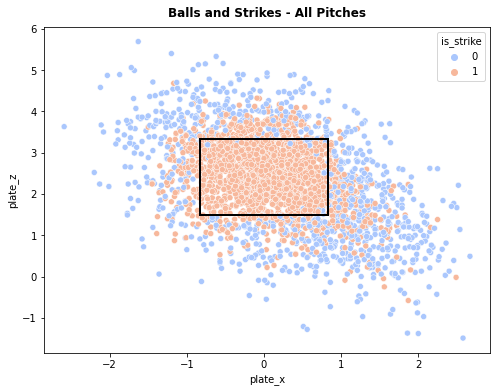

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = cole, x = 'plate_x', y = 'plate_z', hue = 'is_strike', palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

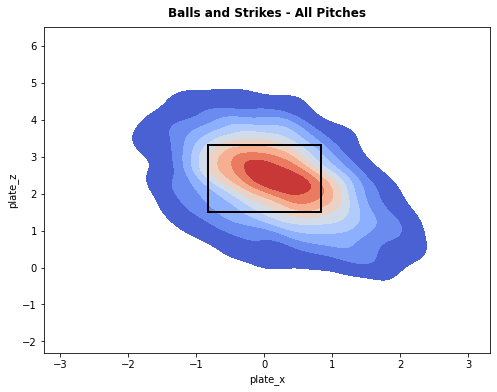

In [15]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = cole, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
#left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Fastball Heatmaps

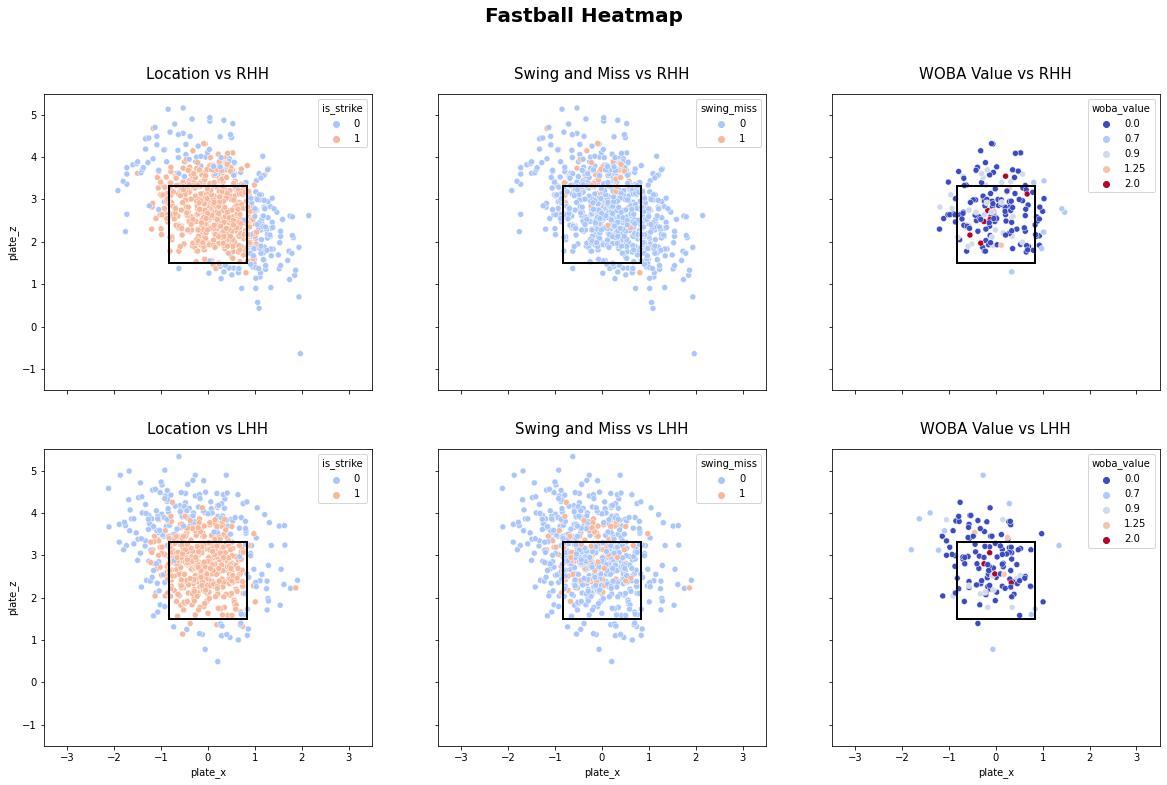

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Fastball Heatmaps Cont.

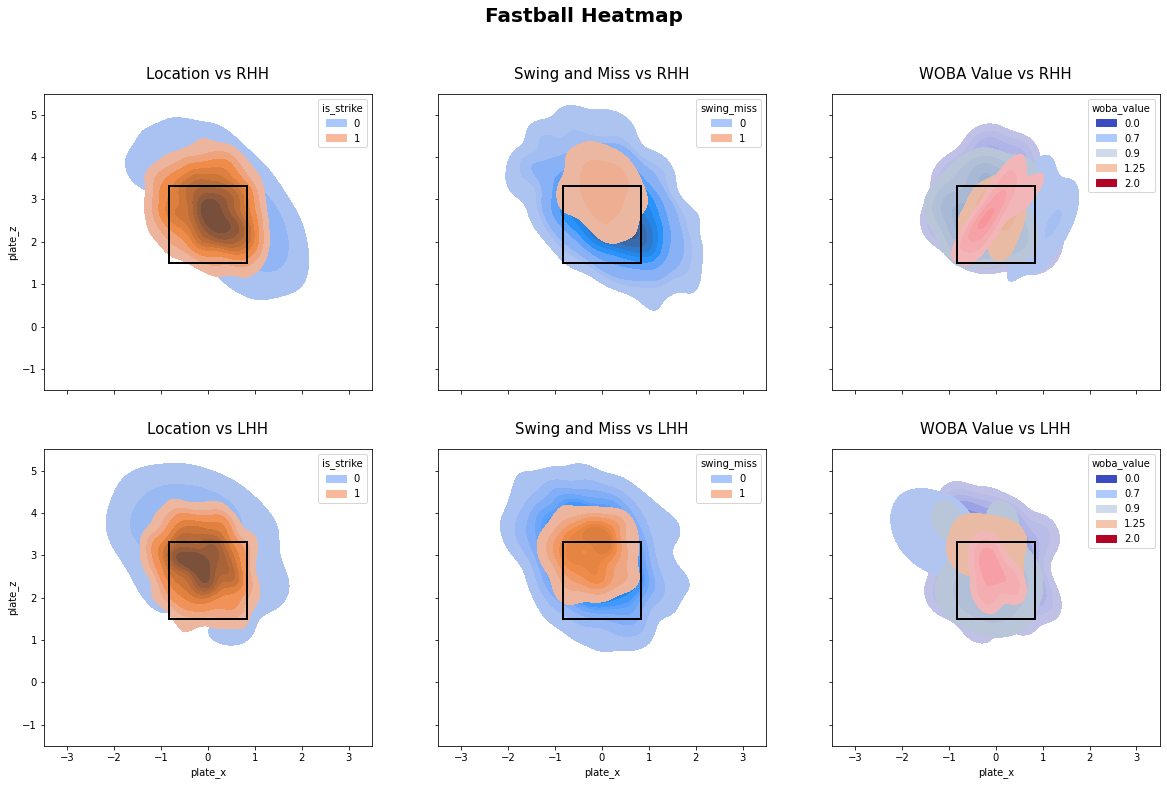

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.kdeplot(ax = axs[0][0], data = r_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'is_strike', palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[0][1], data = r_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'swing_miss', palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[0][2], data = r_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'woba_value', palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[1][0], data = l_ff, x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[1][1], data = l_ff,x = 'plate_x', y = 'plate_z', fill = True,
            hue = 'swing_miss', palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.kdeplot(ax = axs[1][2], data = l_ff, x = 'plate_x', y = 'plate_z', fill = True, 
            hue = 'woba_value', palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Slider Heatmaps

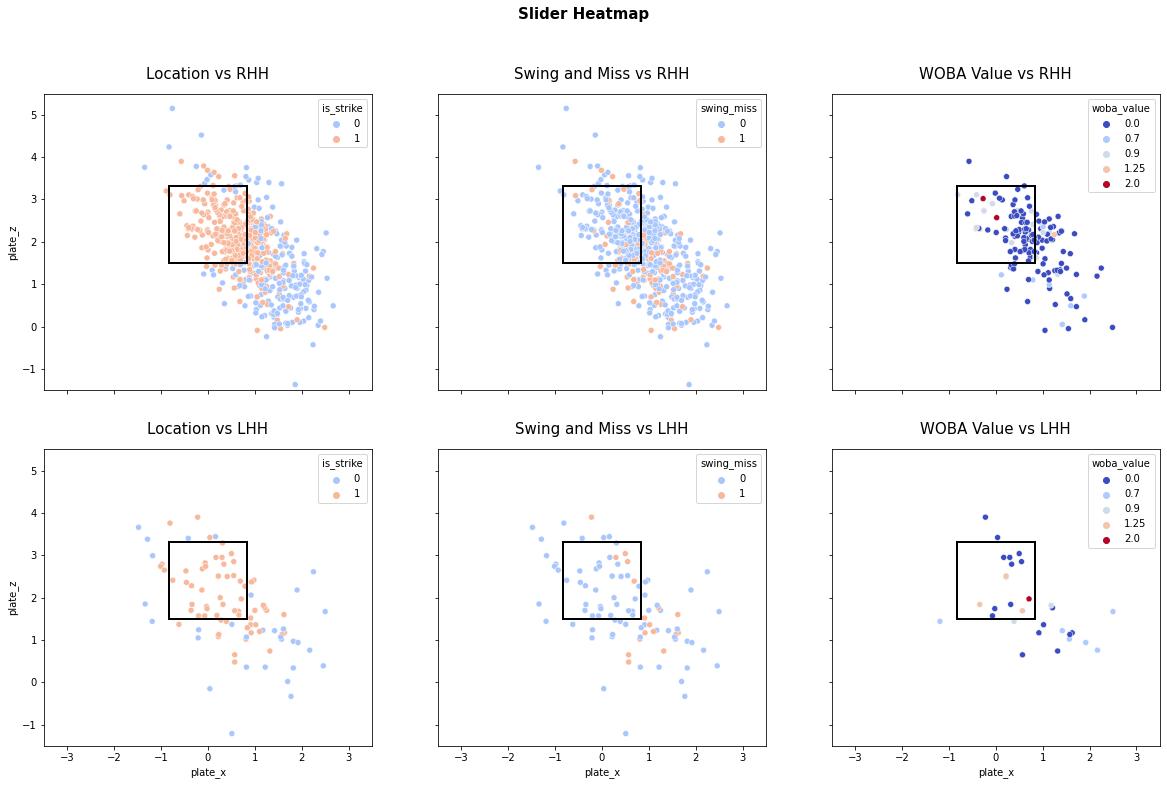

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 15, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2], data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Knuckle Curve Heatmaps

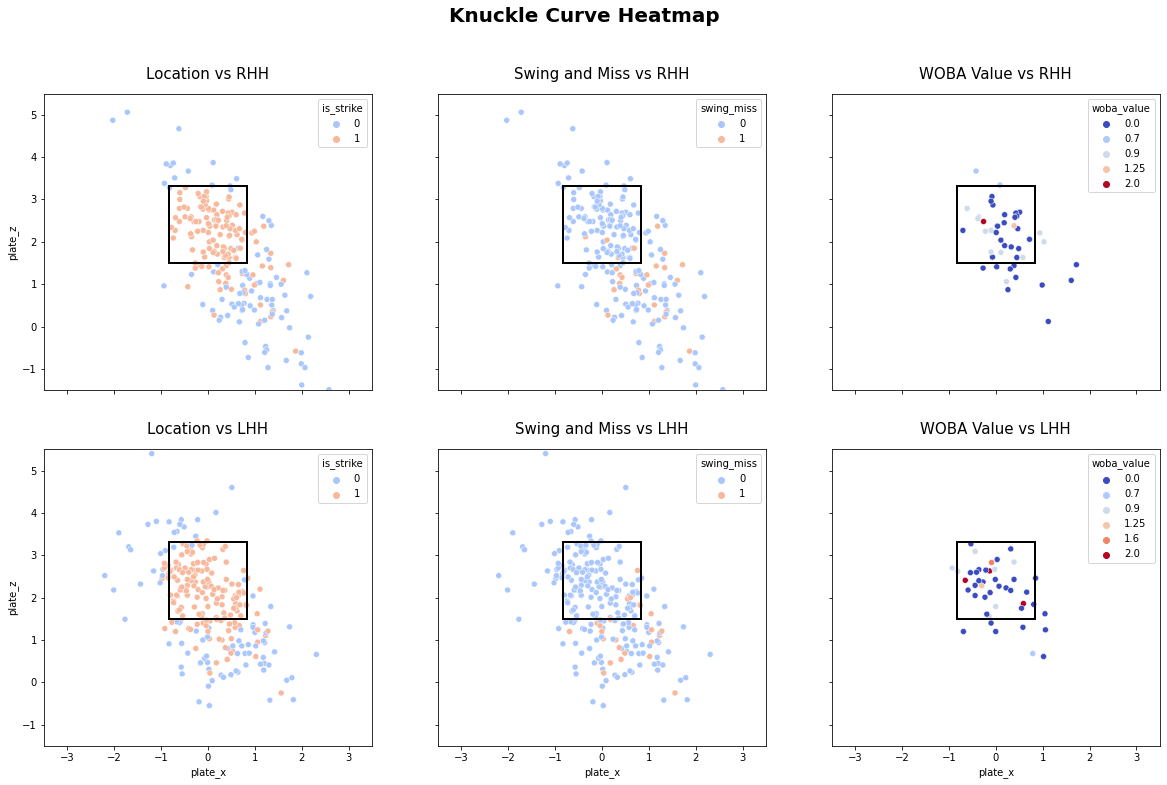

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Changeup Heatmaps

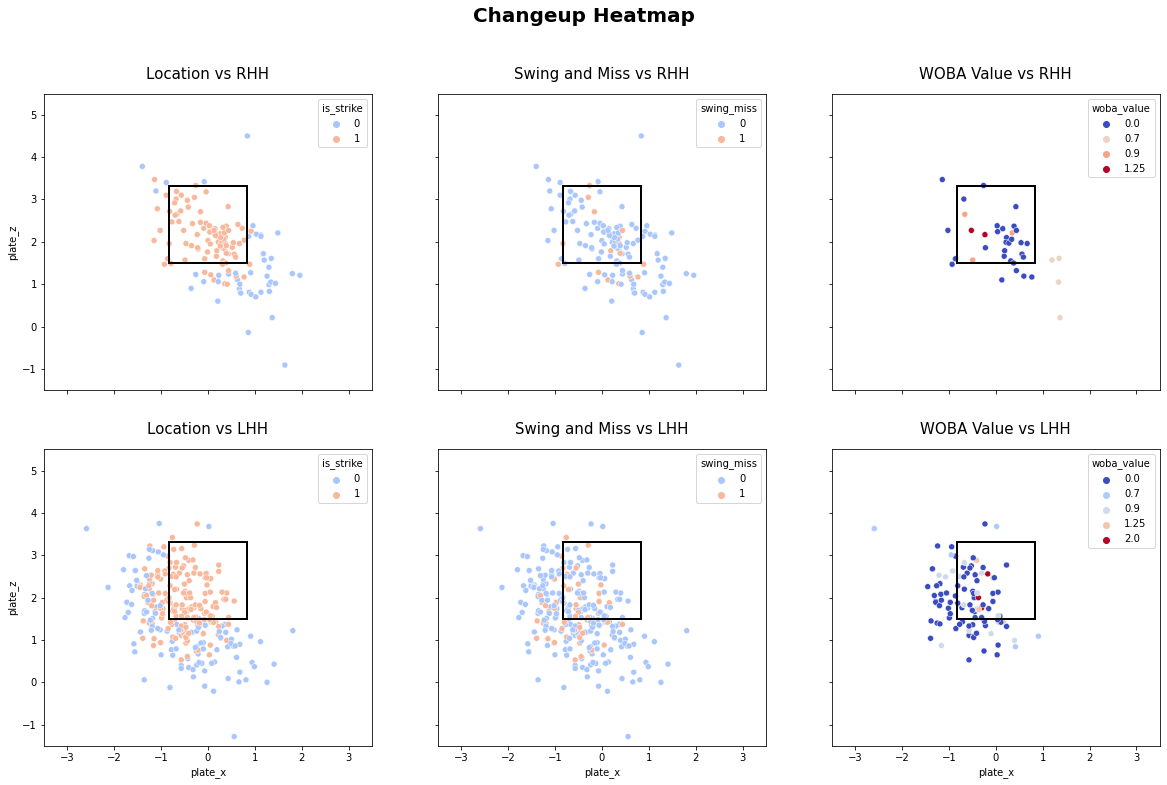

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);

### Sinker Heatmaps

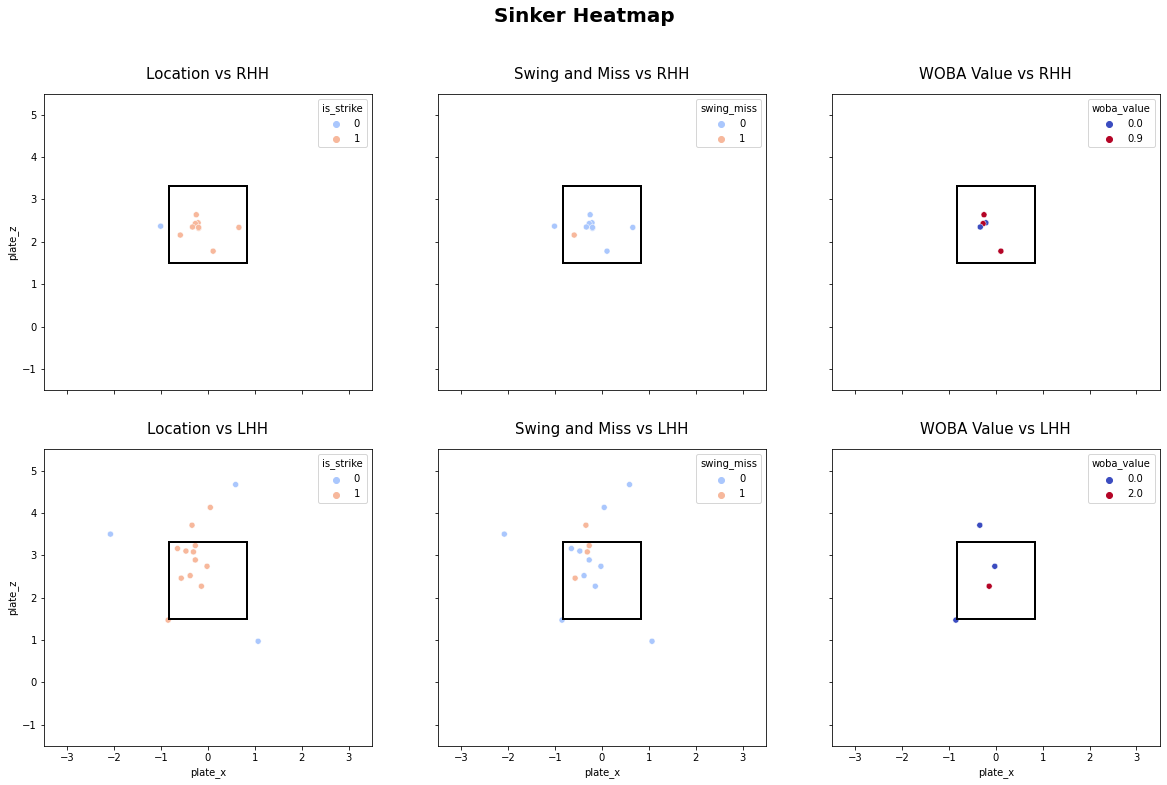

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('WOBA Value vs RHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)

sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('WOBA Value vs LHH', fontsize = 15, pad = 15);